In [1]:


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
#import mdshare
import pyemma
import pandas as pd
from pyemma.util.contexts import settings



/home/dhiman/miniconda3/lib/python3.6/site-packages/pyemma/__init__.py:92: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.7, you have 2.5.6.
  .format(latest=latest, current=current), category=UserWarning)


In [4]:
pdb = '../charmm.pdb'
traj = 'last_400ns.dcd'

In [5]:
feat = pyemma.coordinates.featurizer(pdb)
ca_indices = feat.select_Ca()

feat.add_selection(ca_indices)

data = pyemma.coordinates.source(traj, features=feat, stride=1)

In [6]:
print('type of data:', type(data))


type of data: <class 'pyemma.coordinates.data.feature_reader.FeatureReader'>


In [7]:

print(feat.describe())



['ATOM:ASN 334 CA 4 0 x', 'ATOM:ASN 334 CA 4 0 y', 'ATOM:ASN 334 CA 4 0 z', 'ATOM:LEU 335 CA 18 0 x', 'ATOM:LEU 335 CA 18 0 y', 'ATOM:LEU 335 CA 18 0 z', 'ATOM:CYS 336 CA 37 0 x', 'ATOM:CYS 336 CA 37 0 y', 'ATOM:CYS 336 CA 37 0 z', 'ATOM:PRO 337 CA 49 0 x', 'ATOM:PRO 337 CA 49 0 y', 'ATOM:PRO 337 CA 49 0 z', 'ATOM:PHE 338 CA 61 0 x', 'ATOM:PHE 338 CA 61 0 y', 'ATOM:PHE 338 CA 61 0 z', 'ATOM:GLY 339 CA 81 0 x', 'ATOM:GLY 339 CA 81 0 y', 'ATOM:GLY 339 CA 81 0 z', 'ATOM:GLU 340 CA 88 0 x', 'ATOM:GLU 340 CA 88 0 y', 'ATOM:GLU 340 CA 88 0 z', 'ATOM:VAL 341 CA 103 0 x', 'ATOM:VAL 341 CA 103 0 y', 'ATOM:VAL 341 CA 103 0 z', 'ATOM:PHE 342 CA 119 0 x', 'ATOM:PHE 342 CA 119 0 y', 'ATOM:PHE 342 CA 119 0 z', 'ATOM:ASN 343 CA 139 0 x', 'ATOM:ASN 343 CA 139 0 y', 'ATOM:ASN 343 CA 139 0 z', 'ATOM:ALA 344 CA 152 0 x', 'ATOM:ALA 344 CA 152 0 y', 'ATOM:ALA 344 CA 152 0 z', 'ATOM:THR 345 CA 162 0 x', 'ATOM:THR 345 CA 162 0 y', 'ATOM:THR 345 CA 162 0 z', 'ATOM:ARG 346 CA 176 0 x', 'ATOM:ARG 346 CA 176 0 y

In [8]:
pca = pyemma.coordinates.pca(data, lag=1)
pca_output = pca.get_output()

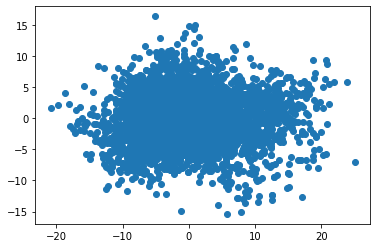

In [9]:

plt.scatter(pca_output[0].T[0],pca_output[0].T[1])


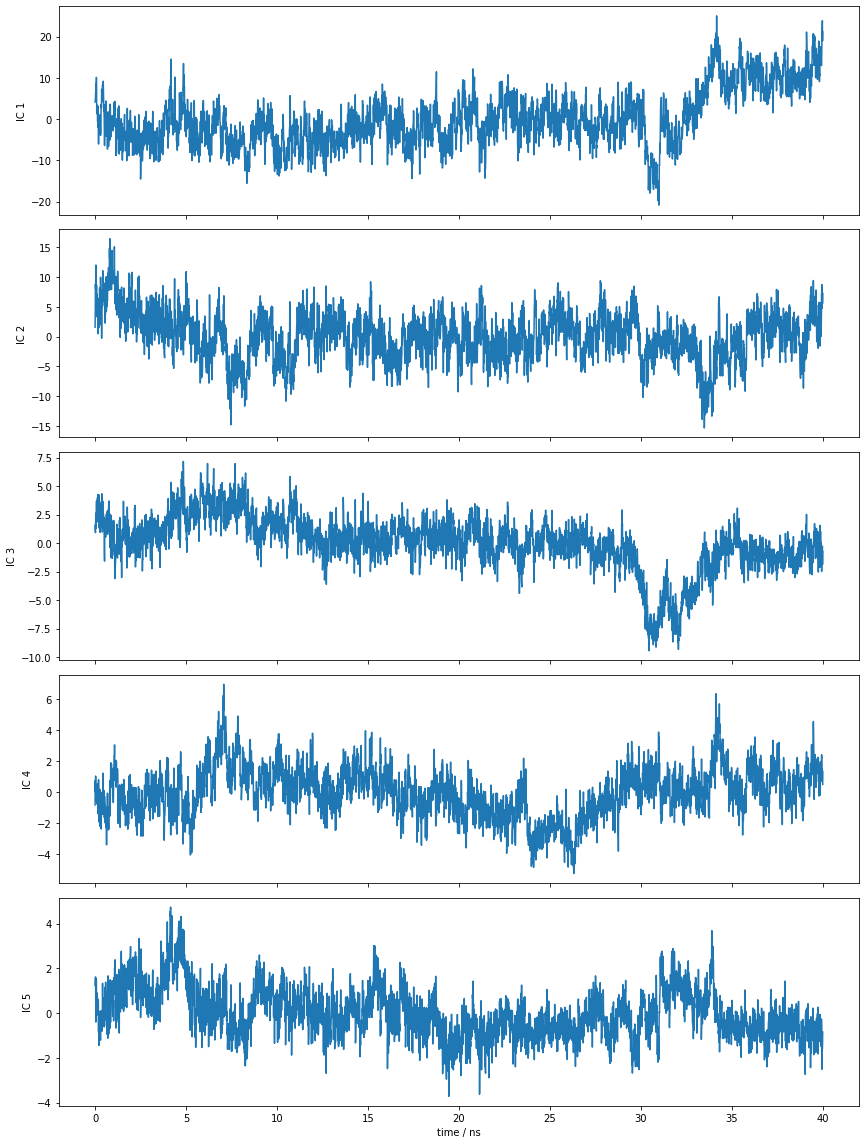

In [10]:
fig, axes = plt.subplots(5, 1, figsize=(12,16), sharex=True)
x = 0.01 * np.arange(pca_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, pca_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()

In [11]:
np.savetxt('pca_eigenvectors.txt',pca.eigenvectors)

In [12]:
pca.eigenvalues

array([4.46176623e+01, 1.62864659e+01, 5.75488863e+00, ...,
       4.04908877e-14, 3.86003257e-14, 2.45364518e-14])

In [13]:
pc1 = pca_output[0].T[0]
pc2 = pca_output[0].T[1]

f1 = open('2d-pca-trajectory.dat','w')
for i in range(len(pc1)):
    print(pc1[i],pc2[i],file=f1)
f1.close()

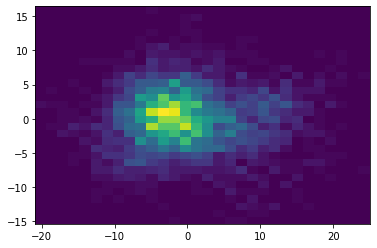

In [14]:
l = np.loadtxt('2d-pca-trajectory.dat')
histgm, x, y, fig = plt.hist2d(l[:,0],l[:,1],bins=30,density=True)

/home/dhiman/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


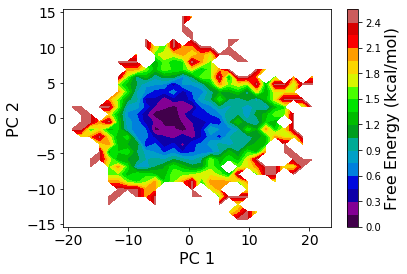

In [15]:
pc1 = x[0:-1]
pc2 = y[0:-1]

G = -0.6*np.log(histgm)
G -= np.min(G)

G = G.transpose()

fig = plt.figure()
cp = plt.contourf(pc1,pc2,G, 20, cmap='nipy_spectral')
#plt.xlim(-100,100)
#plt.clim(0.0,3.0)
cbar = plt.colorbar(cp)
cbar.set_label('Free Energy (kcal/mol)',fontsize=16)
plt.xlabel('PC 1',fontsize=16)
plt.ylabel('PC 2',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('7bz5_delta_pca-free-energy.png',dpi=200,bbox_inches='tight')